# UTS Pengolahan Citra Digital 2025
Nama: Dino Adianto Silalahi

## Soal 1: Deteksi Warna (Merah, Hijau, Biru) dan Histogram

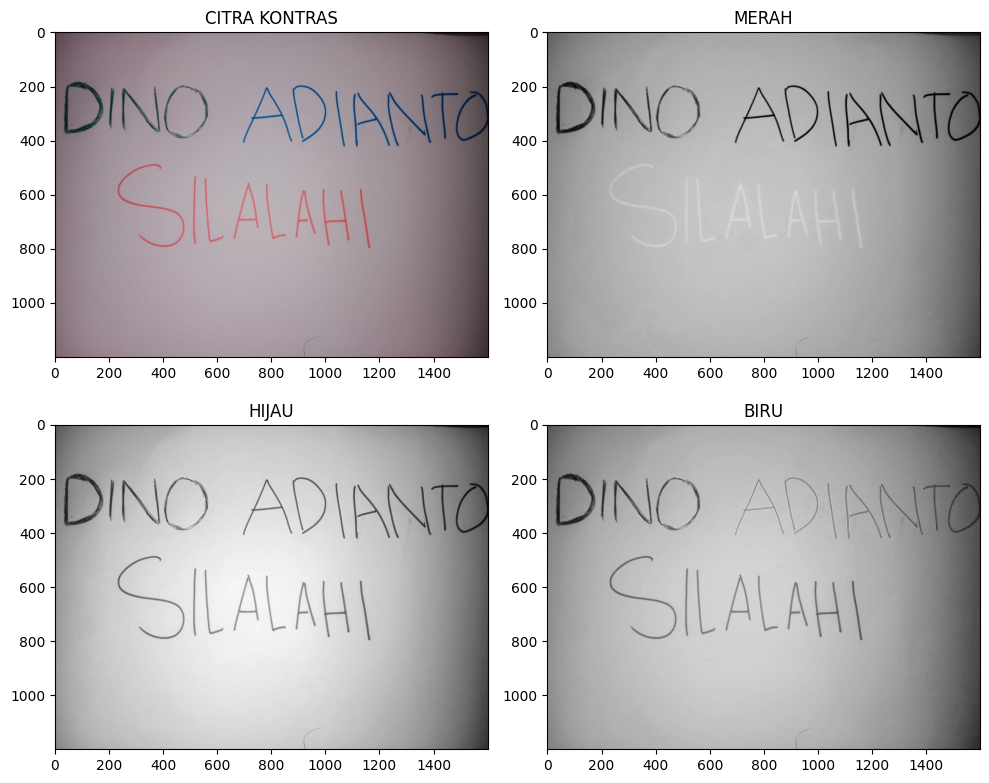

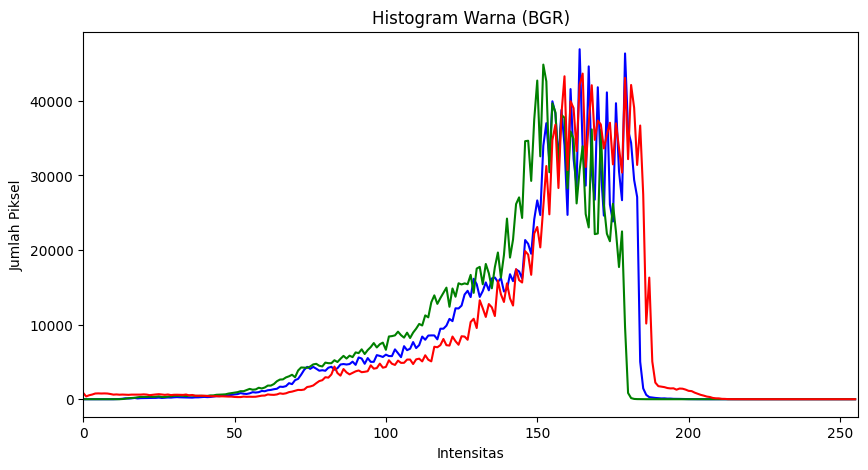

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img = cv2.imread('Dino.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Ekstraksi masing-masing channel
b, g, r = cv2.split(img)

# Gabungkan jadi gambar kontras (RGB)
img_kontras = cv2.merge([b, g, r])

# Tampilkan hasil deteksi
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("CITRA KONTRAS")

plt.subplot(2, 2, 2)
plt.imshow(r, cmap='gray')
plt.title("MERAH")

plt.subplot(2, 2, 3)
plt.imshow(g, cmap='gray')
plt.title("HIJAU")

plt.subplot(2, 2, 4)
plt.imshow(b, cmap='gray')
plt.title("BIRU")

plt.tight_layout()
plt.show()

# Histogram untuk masing-masing channel
plt.figure(figsize=(10, 5))
colors = ('b', 'g', 'r')
for i, col in enumerate(colors):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.title('Histogram Warna (BGR)')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Piksel')
plt.show()


## Soal 2: Ambang Batas Terkecil hingga Terbesar

Nilai Ambang Batas Manual:
- 50
- 100
- 150
- 200

Nilai Ambang Batas Otsu: 130.00


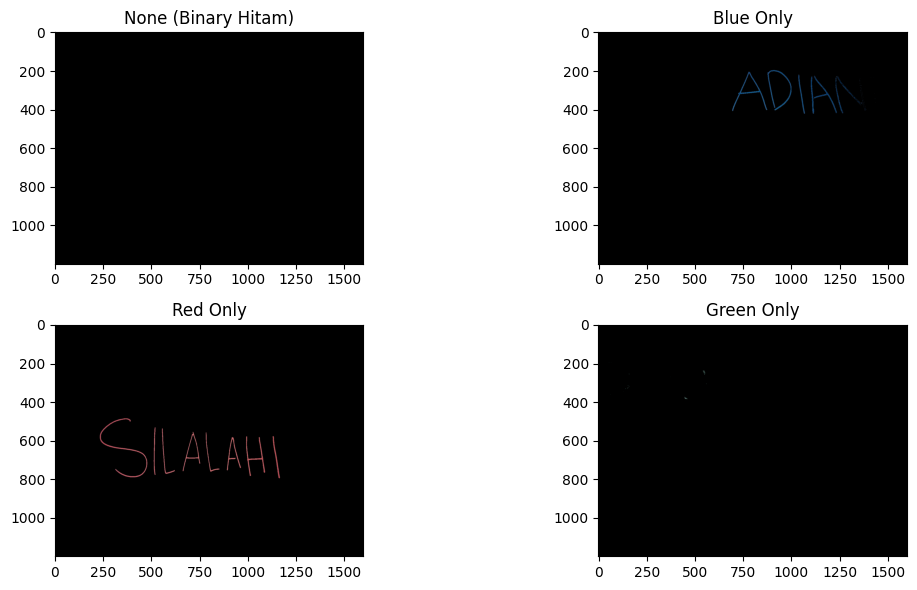

In [2]:
# Konversi gambar ke HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Rentang warna
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

lower_green = np.array([35, 50, 50])
upper_green = np.array([85, 255, 255])

lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])

# Masking untuk masing-masing warna
mask_red = cv2.bitwise_or(cv2.inRange(hsv, lower_red1, upper_red1),
                          cv2.inRange(hsv, lower_red2, upper_red2))
mask_green = cv2.inRange(hsv, lower_green, upper_green)
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

# Terapkan masking ke gambar asli
res_red = cv2.bitwise_and(img, img, mask=mask_red)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)

# Buat gambar "None" dari grayscale -> binary threshold hitam penuh
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, black_img = cv2.threshold(gray, 255, 255, cv2.THRESH_BINARY)  # hasil akan hitam semua


# Hitung nilai Otsu
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
otsu_thresh_val, th_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Daftar ambang batas manual
manual_thresholds = [50, 100, 150, 200]

# Cetak semua nilai ambang batas
print("Nilai Ambang Batas Manual:")
for val in manual_thresholds:
    print(f"- {val}")

print(f"\nNilai Ambang Batas Otsu: {otsu_thresh_val:.2f}")

# Tampilkan hasil
titles = ["None (Binary Hitam)", "Blue Only", "Red Only", "Green Only"]
images = [black_img,
          cv2.cvtColor(res_blue, cv2.COLOR_BGR2RGB),
          cv2.cvtColor(res_red, cv2.COLOR_BGR2RGB),
          cv2.cvtColor(res_green, cv2.COLOR_BGR2RGB)]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 2, i+1)
    cmap = 'gray' if i == 0 else None
    plt.imshow(images[i], cmap=cmap)
    plt.title(titles[i])

plt.tight_layout()
plt.show()


## Soal 3: Memperbaiki Gambar Backlight

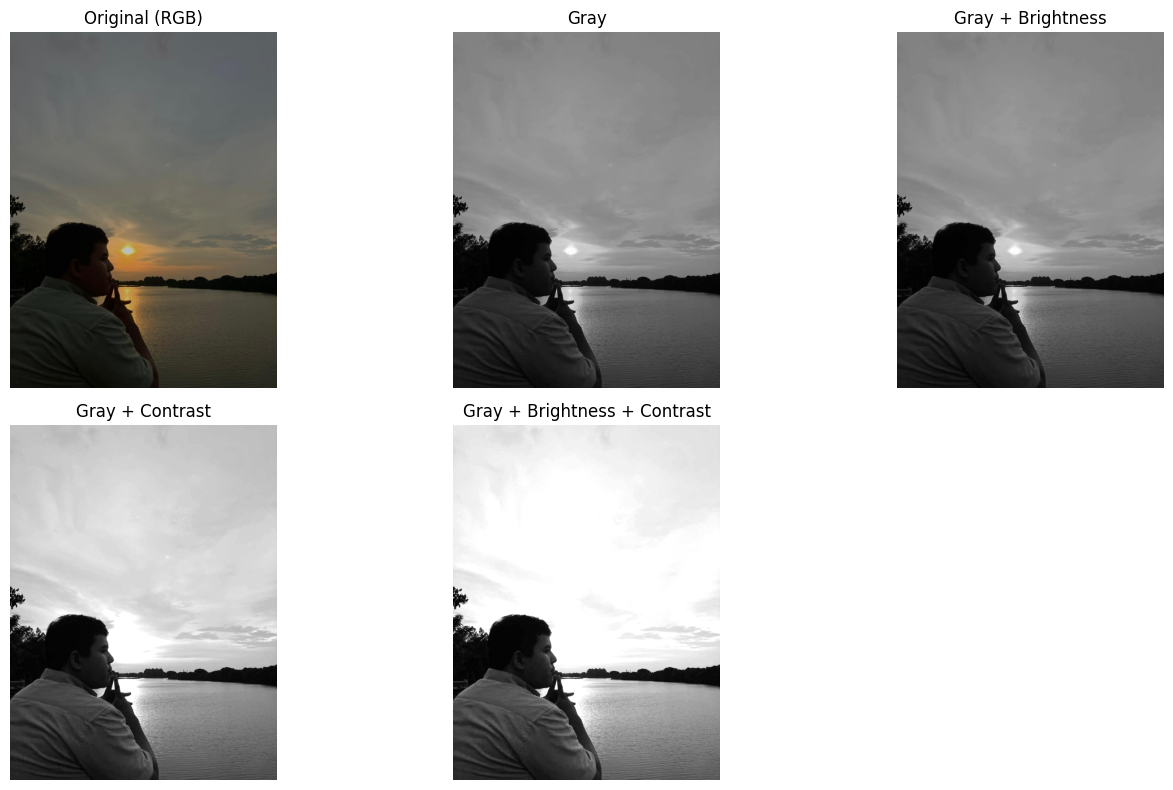

In [3]:
# Load gambar backlight
img_backlight = cv2.imread("Backlight.jpg")

# Konversi ke grayscale
gray = cv2.cvtColor(img_backlight, cv2.COLOR_BGR2GRAY)

# Tingkatkan kecerahan
bright = cv2.convertScaleAbs(gray, alpha=1, beta=40)  # lebih cerah

# Tingkatkan kontras
contrast = cv2.convertScaleAbs(gray, alpha=2.0, beta=0)  # lebih kontras

# Gabungan: cerah + kontras
bright_contrast = cv2.convertScaleAbs(gray, alpha=2.0, beta=40)

# Tampilkan semua hasil
titles = [
    "Original (RGB)",
    "Gray",
    "Gray + Brightness",
    "Gray + Contrast",
    "Gray + Brightness + Contrast"
]

images = [
    cv2.cvtColor(img_backlight, cv2.COLOR_BGR2RGB),
    gray,
    bright,
    contrast,
    bright_contrast
]

plt.figure(figsize=(14, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    cmap = 'gray' if i > 0 else None
    plt.imshow(images[i], cmap=cmap)
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()
